HYPOTHESIS


Impact of Store Size on Sales:
Null Hypothesis (H0): The size of a store does not significantly affect the sales of products.
Effect of Location on Sales:
Null Hypothesis (H0): The location of a store does not have a significant impact on product sales.
Influence of Product Visibility on Sales:
Null Hypothesis (H0): The visibility of a product in the store does not affect its sales.
Effect of Product Type on Sales:
Null Hypothesis (H0): The type/category of a product does not significantly influence its sales.
Impact of Promotions on Sales:
Null Hypothesis (H0): Promotional activities do not significantly impact product sales.
Store Performance Over Time:
Null Hypothesis (H0): There is no significant trend or seasonality in store sales over time.
Effect of Product Pricing on Sales:
Null Hypothesis (H0): The price of a product does not have a significant impact on its sales.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#loading dataset
data=pd.read_csv('Train.csv')
print(data.shape)

(8523, 12)


In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
missing_values=data.isnull().sum()
total_values=np.product(data.shape)
total_missing=missing_values.sum()
percent_missing =(total_missing/total_values)*100
print(percent_missing)
print(missing_values)

3.786812155344362
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


outlet size and item weight are the columns having null values

<ipython-input-6-7e1517397f40>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Item_Outlet_Sales'],y=data['Item_Type'],palette='Set3')


Text(0.5, 1.0, 'sales for each item type')

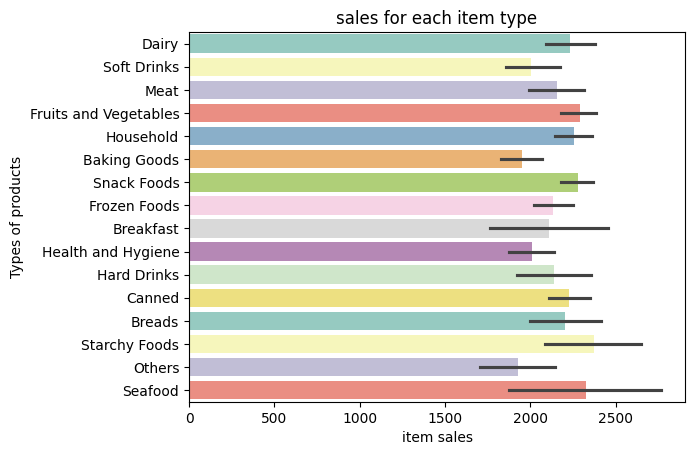

In [6]:
#DATA VISUALISATION
#barplot
sns.barplot(x=data['Item_Outlet_Sales'],y=data['Item_Type'],palette='Set3')
plt.xlabel("item sales")
plt.ylabel('Types of products')
plt.title('sales for each item type')

starchy foods have the highest sales


<ipython-input-7-ceea2a3a14b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Outlet_Type'],y=data['Item_Outlet_Sales'],palette='inferno')


Text(0.5, 1.0, 'sales for each type of outlets')

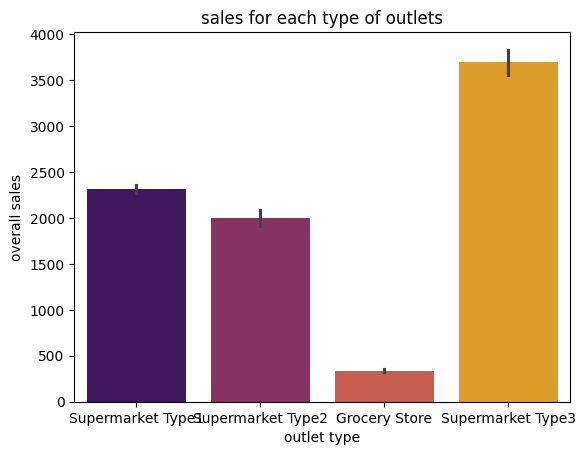

In [7]:
sns.barplot(x=data['Outlet_Type'],y=data['Item_Outlet_Sales'],palette='inferno')
plt.xlabel("outlet type")
plt.ylabel("overall sales")
plt.title("sales for each type of outlets")

supermarket type3 has the highest sales

Text(0.5, 1.0, 'Sales v/s item visibility')

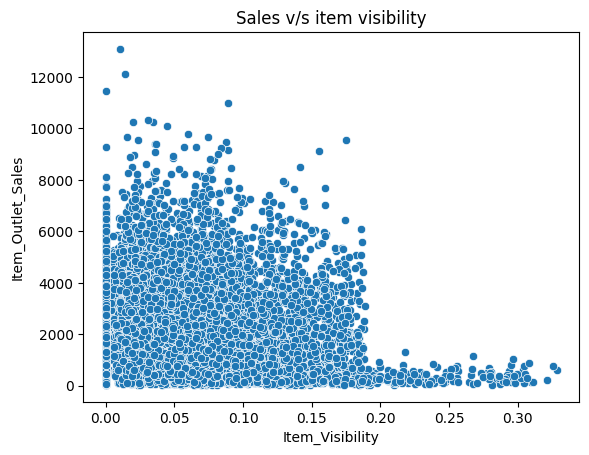

In [8]:
#scatterplot
sns.scatterplot(x=data['Item_Visibility'],y=data['Item_Outlet_Sales'])
plt.title('Sales v/s item visibility')

Text(0.5, 1.0, 'Boxplot of Sales')

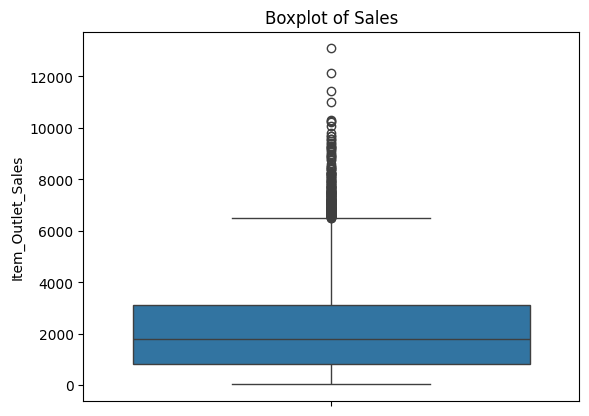

In [9]:
#boxplot
sns.boxplot(data["Item_Outlet_Sales"])
plt.title("Boxplot of Sales")

Text(0.5, 1.0, 'Boxplot of Sales')

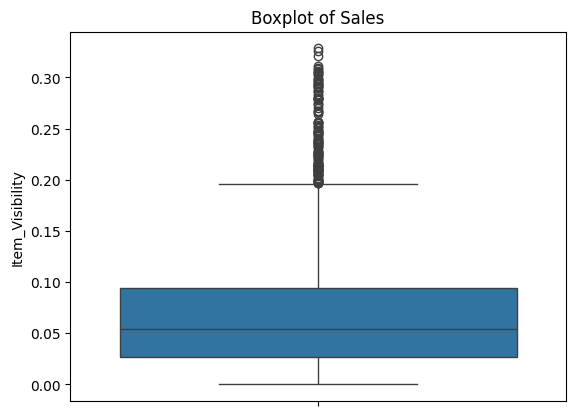

In [10]:
sns.boxplot(data["Item_Visibility"])
plt.title("Boxplot of Sales")

<ipython-input-11-d574a78a37e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm=data.corr()


<Axes: >

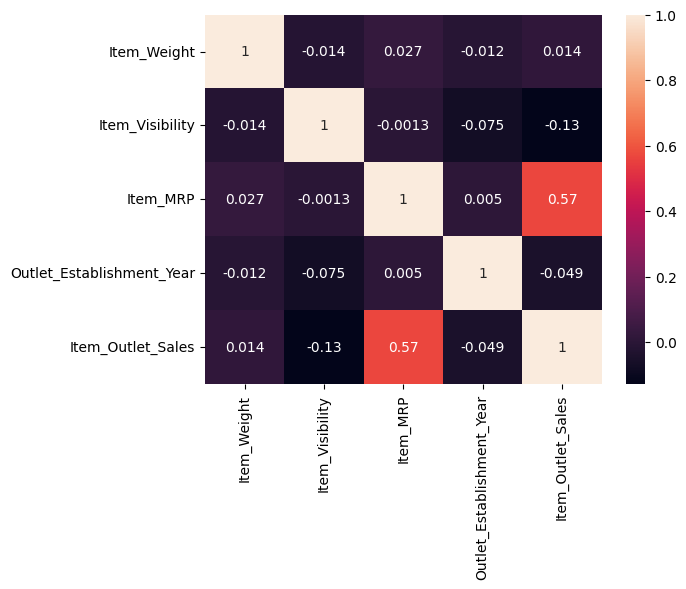

In [11]:
#correlation matrix using heatmap
cm=data.corr()
sns.heatmap(cm,annot=True)

In [19]:
#handling missing values
data.Item_Weight = data.Item_Weight.fillna(0)
data.Outlet_Size = data.Outlet_Size.fillna(method='bfill')


In [20]:
#feature engineering
bins = [0, 70, 140, 210, 280]
groups = ['Low', 'Med', 'High', 'Exp']
data['Item_MRP_Bin_cut'] = pd.cut(data['Item_MRP'], bins=bins, labels=groups)
data[['Item_MRP', 'Item_MRP_Bin_cut']].head()

,Item_MRP,Item_MRP_Bin_cut
0,249.8092,Exp
1,48.2692,Low
2,141.6180,High
3,182.0950,High
4,53.8614,Low


In [21]:
#feature engineering
Item_Type_freq = data['Item_Type'].value_counts(normalize=True)
data['Item_Type_freq'] = data['Item_Type'].apply(lambda x : Item_Type_freq[x])
print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
data[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


,Item_Type,Item_Type_freq
0,Dairy,0.080019
1,Soft Drinks,0.052212
2,Meat,0.049865
3,Fruits and Vegetables,0.144550
4,Household,0.106770
5,Baking Goods,0.076030


In [22]:
#encoding categorical variables
columns_to_encode = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type","Outlet_Type","Item_MRP_Bin_cut","Item_Type_freq"]

for column in columns_to_encode:
    data[column] = data[column].astype('category')
    data[f"{column}_cat"] = data[column].cat.codes


In [23]:
#dropping unwanted columns
data.drop(['Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Size','Item_MRP_Bin_cut','Item_Type_freq','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [24]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_cat,Item_Type_cat,Outlet_Size_cat,Outlet_Location_Type_cat,Outlet_Type_cat,Item_MRP_Bin_cut_cat,Item_Type_freq_cat
0,9.30,0.016047,249.8092,1999,3735.1380,1,4,1,0,1,3,11
1,5.92,0.019278,48.2692,2009,443.4228,2,14,1,2,2,0,7
2,17.50,0.016760,141.6180,1999,2097.2700,1,10,1,0,1,2,6
3,19.20,0.000000,182.0950,1998,732.3800,2,6,0,2,0,2,15
4,8.93,0.000000,53.8614,1987,994.7052,1,9,0,2,1,0,13


In [25]:
#modelling
X = data.drop(columns =['Item_Outlet_Sales'])
Y = data.Item_Outlet_Sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [26]:
#standardisation
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
Xn = scaler.transform(X)'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler().fit(X)\nXn = scaler.transform(X)'

In [27]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
pred = regressor.predict(X_test)

In [29]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)

Mean Squared Error :  1282873.3290701548
R-Squared : 0.11426857228582687


In [31]:
#ridge regularised regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=25)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared :" , r2)

Mean Squared Error: 1281103.6651357336
R-Squared : 0.5286542405779961


In [32]:
#lasso regularised regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=25)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
print("R-Squared :" , r2)

Mean Squared Error (Lasso): 1287976.6772946715
R-Squared : 0.5261255106838169


In [33]:
df=pd.read_csv('Test.csv')

In [238]:
df.shape

(5681, 30)

In [37]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [34]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [35]:
missing_values=df.isnull().sum()
total_values=np.product(df.shape)
total_missing=missing_values.sum()
percent_missing =(total_missing/total_values)*100
print(percent_missing)
print(missing_values)

4.131794978476901
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


<ipython-input-39-49eb10ca26b6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Item_Weight'],y=df['Item_Type'],palette='Set3')


Text(0.5, 1.0, 'weight for each item type')

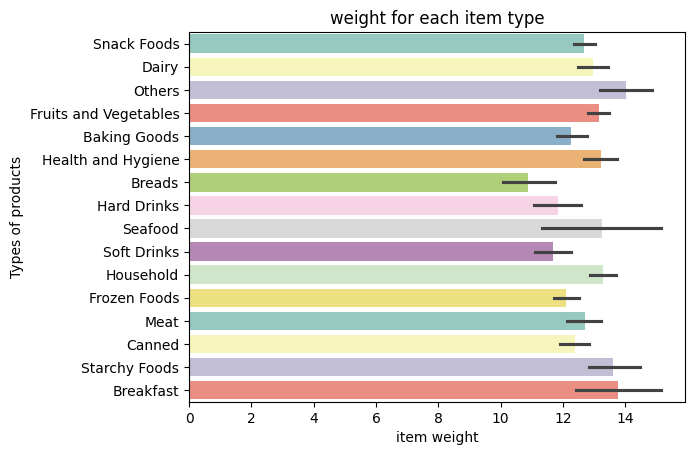

In [39]:
sns.barplot(x=df['Item_Weight'],y=df['Item_Type'],palette='Set3')
plt.xlabel("item weight")
plt.ylabel('Types of products')
plt.title('weight for each item type')

Text(0.5, 1.0, 'Boxplot of Item MRP')

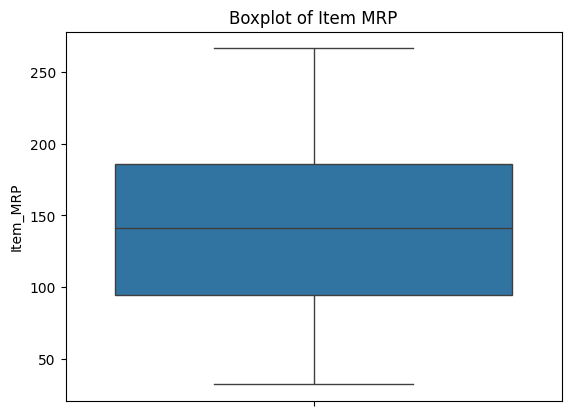

In [41]:
sns.boxplot(df["Item_MRP"])
plt.title("Boxplot of Item MRP")

In [42]:
df.Item_Weight = df.Item_Weight.fillna(0)
df.Outlet_Size = df.Outlet_Size.fillna(method='bfill')

In [43]:
bins = [0, 70, 140, 210, 280]
groups = ['Low', 'Med', 'High', 'Exp']
df['Item_MRP_Bin_cut'] = pd.cut(df['Item_MRP'], bins=bins, labels=groups)
df[['Item_MRP', 'Item_MRP_Bin_cut']].head()

,Item_MRP,Item_MRP_Bin_cut
0,107.8622,Med
1,87.3198,Med
2,241.7538,Exp
3,155.0340,High
4,234.2300,Exp


In [44]:
Item_Type_freq = df['Item_Type'].value_counts(normalize=True)
df['Item_Type_freq'] = df['Item_Type'].apply(lambda x : Item_Type_freq[x])
print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
df[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


,Item_Type,Item_Type_freq
0,Snack Foods,0.138884
1,Dairy,0.079916
2,Others,0.019539
3,Snack Foods,0.138884
4,Dairy,0.079916
5,Fruits and Vegetables,0.137476


In [45]:
columns_to_encode = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type","Outlet_Type","Item_MRP_Bin_cut","Item_Type_freq"]

for column in columns_to_encode:
    df[column] = df[column].astype('category')
    df[f"{column}_cat"] = df[column].cat.codes

In [47]:
df.drop(['Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Size','Item_MRP_Bin_cut','Item_Type_freq','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [48]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_cat,Item_Type_cat,Outlet_Size_cat,Outlet_Location_Type_cat,Outlet_Type_cat,Item_MRP_Bin_cut_cat,Item_Type_freq_cat
0,20.750,0.007565,107.8622,1999,1,13,1,0,1,1,15
1,8.300,0.038428,87.3198,2007,4,4,1,1,1,1,11
2,14.600,0.099575,241.7538,1998,1,11,1,2,0,3,2
3,7.315,0.015388,155.0340,2007,1,13,1,1,1,2,15
4,0.000,0.118599,234.2300,1985,2,4,1,2,3,3,11


In [49]:
x=df.iloc[:,0:].values

In [51]:
y_pred_lasso = lasso_model.predict(x)
y_pred_lasso

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([1963.74456612, 1049.36236148, 2485.42579065, ..., 1742.07854107,
       3303.27906807, 1124.51369726])